## In this session we are going to analyze the innercity dataset from scratch
### Basic to advanced analysis will be perfomed 

In [1]:
# Import the packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
data = pd.read_csv('innercity.csv')

In [3]:
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


# Dataset Description
- cid: a notation for a house
- dayhours: Date house was sold
- price: Price is prediction target
- room_bed: Number of Bedrooms/House
- room_bath: Number of bathrooms/bedrooms
- living_measure: square footage of the home
- lot_measure: quare footage of the lot
- ceil: Total floors (levels) in house
- coast: House which has a view to a waterfront
- sight: Has been viewed
- condition: How good the condition is (Overall)
- quality: grade given to the housing unit, based on grading system
- ceil_measure: square footage of house apart from basement
- basement_measure: square footage of the basement
- yr_built: Built Year
- yr_renovated: Year when house was renovated
- zipcode: zip
- lat: Latitude coordinate
- long: Longitude coordinate
- living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- lot_measure15: lotSize area in 2015(implies-- some renovations)
- furnished: Based on the quality of room 23: total_area: Measure of both living and lot

In [4]:
#rows and columns in the dataset
data.shape

(21613, 23)

In [5]:
#checking for missing values
data.isnull()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Check the number of missing values in each columns
data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [7]:
#info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [8]:
data.nunique()

cid                 21436
dayhours              372
price                3625
room_bed               13
room_bath              30
living_measure       1038
lot_measure          9782
ceil                    6
coast                   2
sight                   5
condition               5
quality                12
ceil_measure          946
basement              306
yr_built              116
yr_renovated           70
zipcode                70
lat                  5034
long                  752
living_measure15      777
lot_measure15        8689
furnished               2
total_area          11163
dtype: int64

In [9]:
print("Bed rooms")
print(*list(data.room_bed.unique()))

Bed rooms
4 3 2 5 6 1 8 33 7 0 9 10 11


In [10]:
#checking unique values of numerical columns
print("Bed rooms:")
print(*list(data.room_bed.unique()))
print("Bath rooms:")
print(*list(data.room_bath.unique()))
print("coast:")
print(*list(data.coast.unique()))
print("sight:")
print(*list(data.sight.unique()))
print("condition:")
print(*list(data.condition.unique()))
print("quality:")
print(*list(data.quality.unique()))
print("basement:")
print(*list(data.basement.unique()))
print("furnished:")
print(*list(data.furnished.unique()))

Bed rooms:
4 3 2 5 6 1 8 33 7 0 9 10 11
Bath rooms:
3.25 2.5 1.0 1.5 1.75 2.0 2.75 2.25 3.0 4.0 4.5 3.5 5.25 4.75 4.25 5.0 7.75 3.75 0.75 5.5 6.75 1.25 6.25 0.0 5.75 6.0 0.5 6.5 7.5 8.0
coast:
0 1
sight:
0 2 4 3 1
condition:
5 3 4 2 1
quality:
9 8 6 7 10 11 5 13 12 4 3 1
basement:
0 800 880 1200 620 1720 540 500 720 390 1800 810 830 700 470 300 960 1450 1570 1600 770 270 160 710 1590 750 890 350 570 920 430 1100 550 940 690 840 590 190 760 900 260 100 630 2120 580 740 400 380 530 1000 435 520 290 1060 490 1070 150 480 120 460 1150 980 140 600 440 660 1030 1050 560 1540 1220 1430 1750 650 200 780 1180 1080 1350 1290 670 850 340 1460 60 280 330 1260 240 250 360 1950 310 1420 790 1440 210 1250 180 1010 640 1210 730 680 1140 1510 990 170 320 80 1390 2010 910 870 1380 130 860 1120 930 1090 1410 1400 1520 4820 420 1110 1170 820 1330 1340 2850 1020 2220 1790 1280 220 1270 1230 2030 90 230 450 1490 1300 1370 2550 1310 1500 1760 370 950 145 1040 1610 510 1160 1320 1130 1830 2060 1190 970 1580 6

In [11]:
#we have a house with 33 bed rooms , which is an outlier in this particular column
data[data.room_bed == 33]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
750,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,0,7620


In [12]:
data['yr_sold']=data['dayhours'].apply(lambda x:x[:4]).astype(int)

In [13]:
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015


In [14]:
# Add a new coulmn 'age_sold' which represents the age at which the house is sold
# Subtract the yr_built from the yr_sold to get the at which the house was sold
data['age_sold']=data.yr_sold-data.yr_built

In [15]:
data.yr_built

0        1956
1        1976
2        2006
3        1916
4        1954
         ... 
21608    2006
21609    2003
21610    2014
21611    1985
21612    1949
Name: yr_built, Length: 21613, dtype: int64

In [16]:
data.yr_sold

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2014
21610    2014
21611    2014
21612    2015
Name: yr_sold, Length: 21613, dtype: int32

In [17]:
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,age_sold
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,58
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,38
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,9
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,98
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,61


### We have certain features that are displayed as integers, but we know that we need to fix them as categories

In [18]:
data.coast=pd.Categorical(data.coast)
data.condition=pd.Categorical(data.condition)
data.quality=pd.Categorical(data.quality)
data.furnished=pd.Categorical(data.furnished)
data.zipcode=pd.Categorical(data.zipcode)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cid               21613 non-null  int64   
 1   dayhours          21613 non-null  object  
 2   price             21613 non-null  int64   
 3   room_bed          21613 non-null  int64   
 4   room_bath         21613 non-null  float64 
 5   living_measure    21613 non-null  int64   
 6   lot_measure       21613 non-null  int64   
 7   ceil              21613 non-null  float64 
 8   coast             21613 non-null  category
 9   sight             21613 non-null  int64   
 10  condition         21613 non-null  category
 11  quality           21613 non-null  category
 12  ceil_measure      21613 non-null  int64   
 13  basement          21613 non-null  int64   
 14  yr_built          21613 non-null  int64   
 15  yr_renovated      21613 non-null  int64   
 16  zipcode           2161

In [22]:
# Decribe function is applied to all the numeric columns in the data and finds the descriptive statistics
# such as mean, median , std, quartiles,min and max values of the variables
data.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,sight,ceil_measure,basement,yr_built,yr_renovated,lat,long,living_measure15,lot_measure15,total_area,yr_sold,age_sold
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,1.718687e+04,2014.322954,43.317818
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,4.158908e+04,0.467616,29.375493
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.423000e+03,2014.000000,-1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,7.035000e+03,2014.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,9.575000e+03,2014.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,1.300000e+04,2015.000000,63.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.652659e+06,2015.000000,115.000000


### You know Q3 and Q1, and IQR = Q3-Q1, any datapoint which is less than Q1 - 1.5IQR  or greater than Q3+1.5IQR  is outlier.

In [26]:
# Find Q1 value
Q1 = data.room_bed.quantile(.25)
Q3 = data.room_bed.quantile(.75)
IQR = Q3 - Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(Q1,Q3,IQR,lower_limit,upper_limit)

3.0 4.0 1.0 1.5 5.5


In [27]:
lower_limit

1.5

In [28]:
upper_limit

5.5

In [29]:
import seaborn as sn
def findoutliers(column):
    outliers=[]
    Q1 = column.quantile(.25)
    Q3= column.quantile(.75)
    IQR= Q3-Q1
    lower_limit = Q1-(IQR*1.5)
    upper_limit= Q3+(IQR*1.5)
    for out1 in column:
        if out1>upper_limit or out1<lower_limit:
            outliers.append(out1)
    return np.array(outliers)

def plotchart(col):
    fig ,(ax1,ax2)= plt.subplots(1,2,figsize=(9,5))
    sn.boxplot(x=col,orient='v',ax=ax1)
    ax1.set_ylabel(col.name)
    ax1.set_title('Box plot of {}'.format(col.name))
    #here we will do distribution plot 
    sn.distplot(col,ax=ax2)
    ax2.set_title('Distribution of {}'.format(col.name))

In [31]:
def analysis_columns(col):
    print('count of outliers',len(findoutliers(col)))
    print('Mean',format(col.mean()))
    print('Median',format(col.median()))
    print('no of missing values',format(col.isnull().sum()))
    plotchart(col)

count of outliers 546
Mean 3.37084162309721
Median 3.0
no of missing values 0


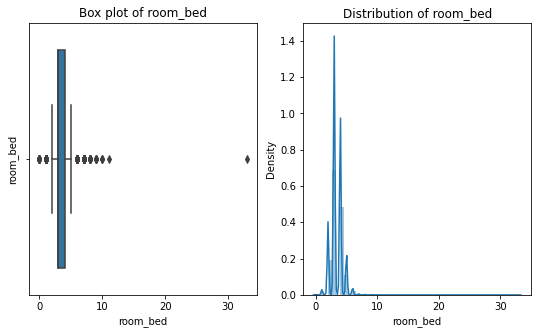

In [32]:
analysis_columns(data.room_bed)

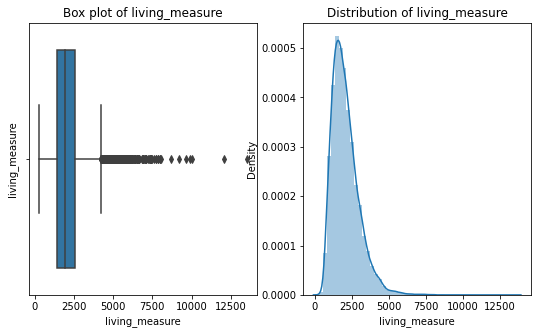

In [33]:
plotchart(data.living_measure)

### Categorical variable analysis

In [34]:
data.coast.value_counts()

0    21450
1      163
Name: coast, dtype: int64

In [35]:
data.coast.value_counts(normalize=True)

0    0.992458
1    0.007542
Name: coast, dtype: float64

The above code converts the values to percentage because of normalize key word

#### 99.25 percent of houses dont have a coast, 0.75 % of houses have a coast

In [39]:
data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'yr_sold', 'age_sold'],
      dtype='object')

In [40]:
data.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

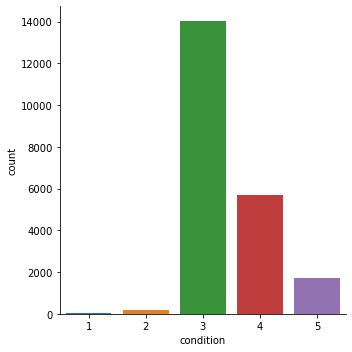

In [41]:
sn.factorplot('condition',data=data,kind='count')

In [42]:
data.quality.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

In [43]:
data.quality.value_counts(normalize=True)

7     0.415537
8     0.280757
9     0.120992
6     0.094295
10    0.052468
11    0.018461
5     0.011197
12    0.004164
4     0.001342
13    0.000601
3     0.000139
1     0.000046
Name: quality, dtype: float64

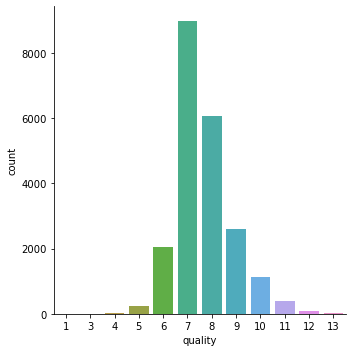

In [44]:
sn.factorplot('quality',data=data,kind='count')

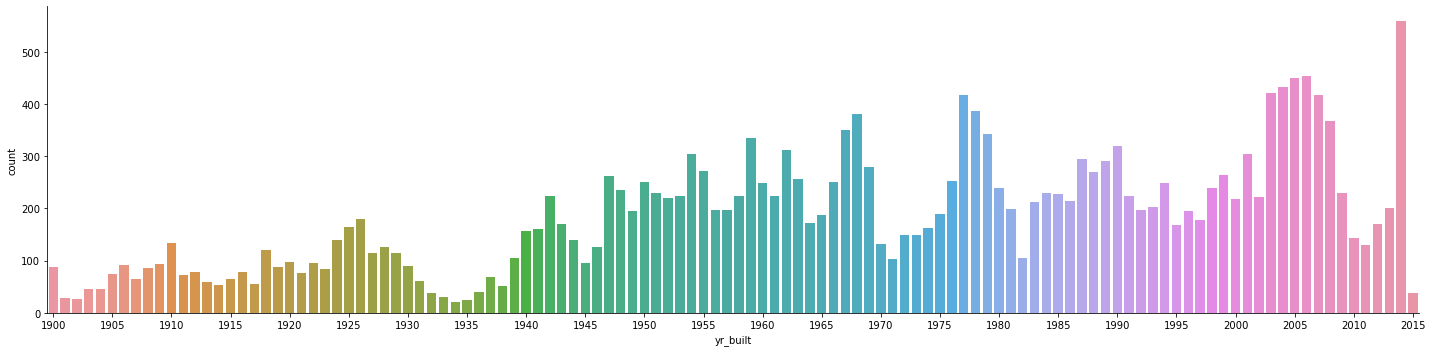

In [49]:
pl = sn.factorplot('yr_built',data=data,aspect=4,kind='count')
pl.set_xticklabels(step=5)

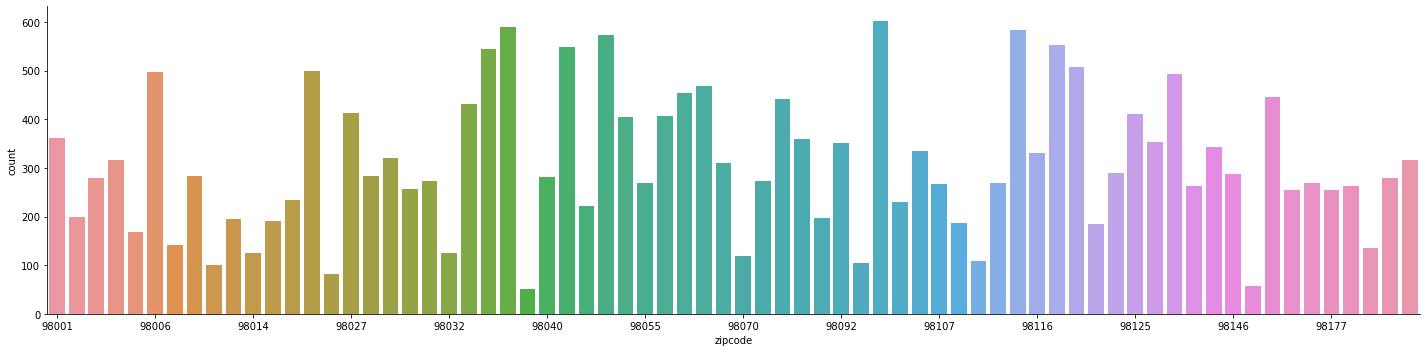

In [46]:
pl = sn.factorplot('zipcode',data=data, aspect = 4 , kind='count')
pl.set_xticklabels(step=5)

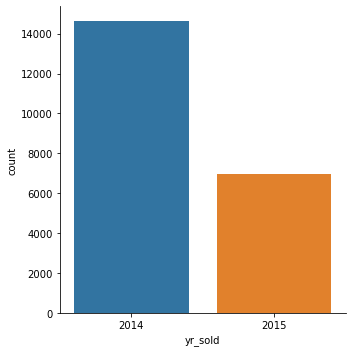

In [50]:
sn.factorplot('yr_sold',data=data,kind='count')

In [51]:
data.yr_sold.value_counts(normalize=True)

2014    0.677046
2015    0.322954
Name: yr_sold, dtype: float64

In [56]:
# Check the skewness
print(data.skew())

cid                  0.243329
price                4.021716
room_bed             1.974300
room_bath            0.511108
living_measure       1.471555
lot_measure         13.060019
ceil                 0.616177
sight                3.395750
ceil_measure         1.446664
basement             1.577965
yr_built            -0.469805
yr_renovated         4.549493
lat                 -0.485270
long                 0.885053
living_measure15     1.108181
lot_measure15        9.506743
total_area          12.956067
yr_sold              0.757299
age_sold             0.469162
dtype: float64


In [57]:
# Check the kurtosis
data.kurtosis()

cid                  -1.260542
price                34.522444
room_bed             49.063653
room_bath             1.279902
living_measure        5.243093
lot_measure         285.077820
ceil                 -0.484723
sight                10.893022
ceil_measure          3.402304
basement              2.715574
yr_built             -0.657408
yr_renovated         18.701152
lat                  -0.676313
long                  1.049501
living_measure15      1.597096
lot_measure15       150.763110
total_area          281.216331
yr_sold              -1.426630
age_sold             -0.657983
dtype: float64

### Bivariate analysis

In [58]:
data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'yr_sold', 'age_sold'],
      dtype='object')

In [59]:
data1=data[['price','lot_measure','living_measure','lot_measure15','living_measure15']]

In [60]:
data1.head()

,price,lot_measure,living_measure,lot_measure15,living_measure15
0,808100,13457,3020,7553,2120
1,277500,7500,2550,8800,2260
2,404000,4324,2370,4348,2370
3,300000,3844,820,3844,1520
4,699000,4050,1400,5940,1900


In [63]:
corr=data1.corr(method='pearson')
print(corr)

                     price  lot_measure  living_measure  lot_measure15  \
price             1.000000     0.089655        0.702044       0.082456   
lot_measure       0.089655     1.000000        0.172826       0.718557   
living_measure    0.702044     0.172826        1.000000       0.183286   
lot_measure15     0.082456     0.718557        0.183286       1.000000   
living_measure15  0.585374     0.144608        0.756420       0.183192   

                  living_measure15  
price                     0.585374  
lot_measure               0.144608  
living_measure            0.756420  
lot_measure15             0.183192  
living_measure15          1.000000  


In [62]:
corr=data1.corr()
print(corr)

                     price  lot_measure  living_measure  lot_measure15  \
price             1.000000     0.089655        0.702044       0.082456   
lot_measure       0.089655     1.000000        0.172826       0.718557   
living_measure    0.702044     0.172826        1.000000       0.183286   
lot_measure15     0.082456     0.718557        0.183286       1.000000   
living_measure15  0.585374     0.144608        0.756420       0.183192   

                  living_measure15  
price                     0.585374  
lot_measure               0.144608  
living_measure            0.756420  
lot_measure15             0.183192  
living_measure15          1.000000  


In [61]:
corr=data1.corr(method='spearman')
print(corr)

                     price  lot_measure  living_measure  lot_measure15  \
price             1.000000     0.074937        0.644192       0.062763   
lot_measure       0.074937     1.000000        0.304159       0.922316   
living_measure    0.644192     0.304159        1.000000       0.283864   
lot_measure15     0.062763     0.922316        0.283864       1.000000   
living_measure15  0.572289     0.359572        0.746982       0.365723   

                  living_measure15  
price                     0.572289  
lot_measure               0.359572  
living_measure            0.746982  
lot_measure15             0.365723  
living_measure15          1.000000  


<AxesSubplot:>

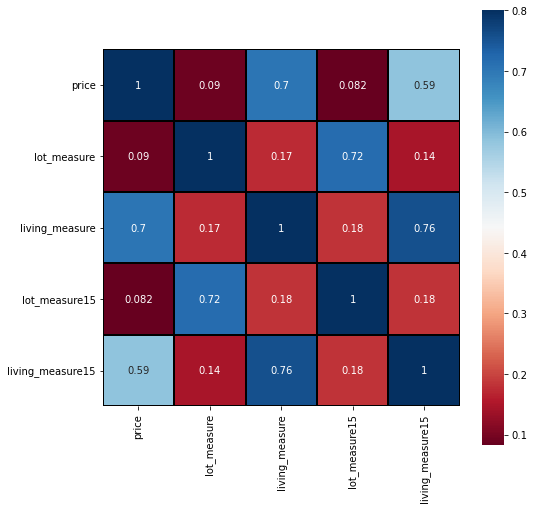

In [68]:
plt.figure(figsize=(8,8))
sn.heatmap(corr,vmax=.8,linewidths=0.01,
           square=True,annot=True,cmap='RdBu',linecolor='black')

                     price  lot_measure  living_measure  lot_measure15  \
price             1.000000     0.089655        0.702044       0.082456   
lot_measure       0.089655     1.000000        0.172826       0.718557   
living_measure    0.702044     0.172826        1.000000       0.183286   
lot_measure15     0.082456     0.718557        0.183286       1.000000   
living_measure15  0.585374     0.144608        0.756420       0.183192   

                  living_measure15  
price                     0.585374  
lot_measure               0.144608  
living_measure            0.756420  
lot_measure15             0.183192  
living_measure15          1.000000  


<AxesSubplot:>

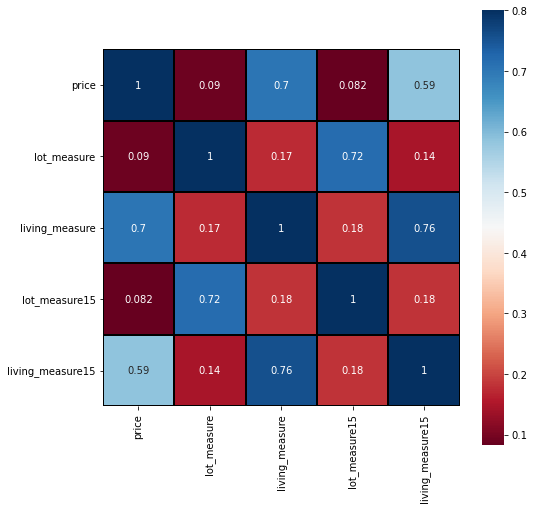

In [69]:
data1=data[['price','lot_measure','living_measure','lot_measure15','living_measure15']]
corr=data1.corr()
print(corr)
plt.figure(figsize=(8,8))
sn.heatmap(corr,vmax=.8,linewidths=0.01,
           square=True,annot=True,cmap='RdBu',linecolor='black')

In [70]:
data1.cov()

,price,lot_measure,living_measure,lot_measure15,living_measure15
price,1.349550e+11,1.364223e+09,2.368699e+08,8.270724e+08,1.473895e+08
lot_measure,1.364223e+09,1.715659e+09,6.574684e+06,8.126540e+08,4.105319e+06
living_measure,2.368699e+08,6.574684e+06,8.435337e+05,4.596302e+06,4.761601e+05
lot_measure15,8.270724e+08,8.126540e+08,4.596302e+06,7.455182e+08,3.428259e+06
living_measure15,1.473895e+08,4.105319e+06,4.761601e+05,3.428259e+06,4.697612e+05


In [ ]:
data1=data[['price','lot_measure','living_measure','lot_measure15','living_measure15']]
corr=data1.corr(method = 'pearson')
print(corr)
plt.figure(figsize=(8,8))
sn.heatmap(corr,vmax=.8,linewidths=0.01,
           square=True,annot=True,cmap='RdBu',linecolor='black')

In [ ]:
corr=data.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,
           square=True,annot=True,cmap='RdBu',linecolor='black')

In [ ]:
#Plots between independent variables and price that is target
sn.regplot(x=data.room_bed,y=data.price,color='g')

In [ ]:
sn.regplot(x=data.room_bath,y=data.price,color='g')

In [ ]:
from scipy.stats import spearmanr

In [ ]:
sn.regplot(x=data.living_measure,y=data.price,color='g')
print(spearmanr(data.living_measure,data.price))

In [ ]:
#bivariate analysis for independent variable being a category and dependent variable being 
#a number

sn.barplot(x=data.quality,y=data.price)

In [ ]:
sn.barplot(x=data.condition,y=data.price)

In [ ]:
data.age_sold.nunique()

In [ ]:
data.age_sold.max()

In [ ]:
data.age_sold.min()

In [ ]:
data['age_bin']=pd.cut(data.age_sold,bins=[0,10,20,25,30,50,75,100,150])
sn.barplot(x=data.age_bin,y=data.price)